# Final Project Report

* Class: DS 5100
* Student Name: Kaleigh O'Hara
* Student Net ID: ear3cg
* This URL: https://github.com/kaleigh315/ear3cg_ds5100_montecarlo/blob/main/FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the [Final Project](https://ontoligent.github.io/DS5100-2023-07-R/notebooks/M00_FinalProject/FinalProjectInstructions.html) isntructions and put your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/kaleigh315/ear3cg_ds5100_montecarlo

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [1]:
'''
import unittest
import pandas as pd
import numpy as np
import random
from itertools import permutations
import seaborn as sns
from matplotlib import pyplot as plt

class Die:
    """
    A die has a given number of sides, or "faces," and a given number of weights, and can be rolled to select a face.
    Each side contains a unique symbol. Symbols may be all alphabetic or all numeric.
    The weights are just numbers, not a normalized probability distribution.
    The die has one behavior, which is to be rolled one or more times.
    """
    def __init__(self, face):
        """
        PURPOSE: This is the object initializer that is called when an instance of the Die class is created.
    
        INPUTS:
        face    numpy array of ints, floats or strings that indicate the face values of a die
        
        OBJECT CHANGES:
        dice    dataframe of faces and weights initialized with faces as the index and weights as the cell values
        """
        self.face = face
        if not isinstance(face, np.ndarray):
            raise TypeError("Face values must be a NumPy array.")
        if len(set(face)) != len(face):
            raise ValueError("Face values must be distinct.")
        self.dice = pd.DataFrame({'faces': face, 'weights': np.ones(len(face))}, columns=['faces', 'weights'])
        self.dice = self.dice.set_index(['faces'])
    def change_weight(self, face_val, new_weight):
        """
        PURPOSE: This functions checks if the face value to be changed exists in the initial array of face values.
                 Then, it checks to see if the weight is a valid type, i.e. if it is numeric (integer or float) or castable as numeric.
    
        INPUTS
        face_val   face value whose weight to change
        new_weight  weight to replace the existing weight of for face_val
        
        OBJECT CHANGES:
        dice        specified weight of given column updates
        """
        if not face_val in self.face:
            raise IndexError("Face value's weight to be changed must exist in the face array.")
        if not isinstance(new_weight, float): 
            if not isinstance(new_weight, int):
                try:
                    new_weight = pd.to_numeric(new_weight)
                except:
                    raise TypeError("New weight must be numeric.")
        for i in range(len(self.dice)):
            if self.dice.index[i] == face_val:
                self.dice.iloc[i,0] = new_weight
    def roll_die(self, num_rolls = 1):
        """
        PURPOSE: This function is a random sample with replacement, from the private die data frame, that applies the weights
    
        INPUTS
        num_rolls  how many times the die is to be rolled; defaults to 1
        
        RETURN: This function returns a list of specified number of outcomes of rolled dice
        """
        return(random.choices(self.dice.index, weights = self.dice['weights'], k = num_rolls))
    def curr_state(self):
        """
        PURPOSE: This function provides the dice object data frame to users.
        
        RETURN: This function returns a copy of the dice object data frame.
        """
        return(self.dice.copy())
    
class Game: 
    """
    A game consists of rolling of one or more similar dice (Die objects) one or more times.
    Each game is initialized with a Python list that contains one or more dice.
    Game objects have a behavior to play a game, i.e. to roll all of the dice a given number of times.
    Game objects only keep the results of their most recent play.
    """
    def __init__(self, dice):
        """
        PURPOSE: This is the object initializer that is called when an instance of the Game class is created.
    
        INPUTS:
        dice    a list of already instantiated similar dice
        
        OBJECT CHANGES:
        dice    object of dataframe of faces and weights initialized with faces as the index and weights as the cell values defined for the class
        """
        self.dice = dice
    def play(self, rolls_play):
        """
        PURPOSE: This function plays the game by rolling the dice a specified number of times and returns an organized data frame of results for each dice rolled.
        
        INPUTS:
        rolls_play  integer parameter to specify how many times the dice should be rolled
        
        OBJECT CHANGES:
        result_df  data frame with results of the game with roll number as named index, die number as columns and face rolled in that instance in each cell
        """
        result_list = []
        for i in range(len(self.dice)):
            die = self.dice[i]
            result_list.append(die.roll_die(num_rolls = rolls_play))
        self.result_df = pd.DataFrame(data = result_list).T
        self.result_df.index.name = 'Roll Number'
        self.result_df = self.result_df.reset_index()
        self.result_df['Roll Number'] = self.result_df['Roll Number'] + 1
        self.result_df = self.result_df.set_index(['Roll Number'])
        self.result_df.columns = [x for x in range(1,len(self.dice)+1)]
    def results(self, form = 'wide'):
        """
        PURPOSE: This function shows the user the results in either "narrow" or "wide" form of the most recent play. A ValueError is raised if something other than "narrow" or "wide" is passed.
        
        INPUTS:
        form  a parameter to specify to return the data frame in "narrow" or "wide" form which defaults to wide form
        
        RETURN: This function returns result_df, data frame with results of the game, in either "narrow" form 
                (with a MultiIndex, comprising the roll number and the die number (in that order), and a single column with the outcomes)
                or in "wide" form (with roll number as named index, die number as columns and face rolled in that instance in each cell)
        
        OBJECT CHANGES:
        result_df  orientation of data frame of results will change to a MultiIndex, comprising the roll number and the die number (in that order), and a single column with the outcomes if "narrow" form is selected
        """
        if form == 'narrow':
            self.result_df = self.result_df.reset_index()#
            self.result_df = pd.melt(self.result_df, id_vars = 'Roll Number', value_vars = list(range(1,(len(self.dice)+1))))
            self.result_df = self.result_df.rename({'variable':'Die Number', 'value':'Outcome'}, axis=1)
            self.result_df = self.result_df.set_index(['Roll Number','Die Number'])
            self.result_df = pd.DataFrame(self.result_df)
        elif form != 'wide':
            raise ValueError("Form value must be 'narrow' or 'wide.'")
        else:
            self.result_df = pd.DataFrame(self.result_df)
        return(self.result_df)

class Analyzer: 
    """
    An Analyzer object takes the results of a single game and computes various descriptive statistical properties about it.
    """
    def __init__(self, game_object):
        """
        PURPOSE: This function takes a game object as its input parameter. It throwa a ValueError if the passed value is not a Game object.
        
        INPUTS:
        game_object  an object of the Game class
        
        OBJECT CHANGES:
        game_object  data frame with results of the game
        """
        self.game_object = game_object
        if not isinstance(game_object, Game):
            raise ValueError("Passed value must be a Game object.")
        self.results = self.game_object.results(form = 'wide')
    def jackpot(self):
        """
        PURPOSE: This function calculates how many jackpots (a result in which all faces are the same) are rolled in a game.
        
        RETURN:
        jackpot_count  integer for the number of jackpots
        """
        count = 0
        jackpot_count = 0
        for i in range(len(self.results)):
            count = 0
            for j in range(len(self.results.columns)):
                if j != 0:
                    if self.results.iloc[i,j] == self.results.iloc[i,j-1]:
                        count+=1
            if count == (len(self.results.columns)-1):
                jackpot_count += 1
        return(jackpot_count)  
    def face_counts(self):
        """
        PURPOSE: This function computes how many times a given face is rolled in each event.
        
        RETURN:
        countval_df  a data frame with an index of the roll number, face values as columns, and count values in the cells (i.e. it is in wide format)
        
        OBJECT CHANGES:
        countval_df  creates a data frame with count of face values in the cells
        """
        faces = list(self.game_object.dice[0].dice.index)
        countval = []
        for i in faces:
            count_roll = []
            for j in range(len(self.results)):
                count_face = 0
                for k in range(len(self.results.columns)):
                    if self.results.iloc[j,k] == i:
                        count_face +=1
                count_roll.append(count_face)
            countval.append(count_roll)
        countval_df = pd.DataFrame(countval).T
        countval_df.index.name = 'Roll Number'
        countval_df = countval_df.reset_index()
        countval_df['Roll Number'] = countval_df['Roll Number'] + 1
        self.countval_df = countval_df.set_index(['Roll Number'])
        self.countval_df.columns = [faces]
        return(self.countval_df)
    def combination(self):
        """
        PURPOSE: This function computes the distinct combinations of faces rolled, along with their counts.
        
        RETURN:
        combo_df  a data frame of the count of order-independent, distinct combinations with a MultiIndex of distinct combinations and a column for the associated counts
        """
        results = self.results
        face_counts = self.face_counts()
        combo_list = []
        track_list = []
        for roll in range(len(results)):
            if list(face_counts.iloc[roll,:]) in track_list:
                index_results = track_list.index(list(face_counts.iloc[roll,:]))
                combo_list.append(results.iloc[index_results,:])
                track_list.append(list(face_counts.iloc[roll,:]))
            else:
                track_list.append(list(face_counts.iloc[roll,:]))
                combo_list.append(results.iloc[roll,:])
        combo_df = pd.DataFrame(combo_list)
        combo_df = pd.DataFrame(combo_df.value_counts())
        return(combo_df)
    def permutation(self):
        """
        PURPOSE: This function computes the distinct permutations of faces rolled, along with their counts.
        
        RETURN:
        combo_df  a data frame of the count of order-dependent, distinct permutations with a MultiIndex of distinct combinations and a column for the associated counts
        """
        results = self.results
        perm_list = []
        for roll in range(len(results)):
            perm = results.iloc[roll,:]
            perm_list.append([str(val) for val in perm])
        perm_df = pd.DataFrame(perm_list)
        perm_df = pd.DataFrame(perm_df.value_counts())
        return(perm_df)
'''

'\nimport unittest\nimport pandas as pd\nimport numpy as np\nimport random\nfrom itertools import permutations\nimport seaborn as sns\nfrom matplotlib import pyplot as plt\n\nclass Die:\n    """\n    A die has a given number of sides, or "faces," and a given number of weights, and can be rolled to select a face.\n    Each side contains a unique symbol. Symbols may be all alphabetic or all numeric.\n    The weights are just numbers, not a normalized probability distribution.\n    The die has one behavior, which is to be rolled one or more times.\n    """\n    def __init__(self, face):\n        """\n        PURPOSE: This is the object initializer that is called when an instance of the Die class is created.\n    \n        INPUTS:\n        face    numpy array of ints, floats or strings that indicate the face values of a die\n        \n        OBJECT CHANGES:\n        dice    dataframe of faces and weights initialized with faces as the index and weights as the cell values\n        """\n    

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```
import statistics
import unittest
import pandas as pd
import numpy as np
import random
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer

class DieTestSuite(unittest.TestCase):
    
    def test_1_change_weight(self):
        faces = np.array([1,2,3,4,5,6])
        mydie = Die(faces)
        mydie.change_weight(1,3)
        self.assertTrue(3 in mydie.dice['weights'])
    def test_1_roll_die(self):
        faces = np.array([1,2,3,4,5,6])
        mydie = Die(faces)
        self.assertTrue(isinstance(mydie.roll_die(5), list))
    def test_1_curr_state(self):
        faces = np.array([1,2,3,4,5,6])
        mydie = Die(faces)
        self.assertTrue(mydie.curr_state().shape == (len(faces), 1))

class GameTestSuite(unittest.TestCase):
    
    def test_1_play(self):
        faces = np.array([1,2,3,4,5,6])
        mydie = Die(faces)
        mydie2 = Die(faces)
        mydie3 = Die(faces)
        list_die = [mydie,mydie2,mydie3]
        test = Game(list_die)
        roll_number = 2
        test.play(roll_number)
        self.assertTrue(test.result_df.shape == (roll_number, len(list_die)))
    def test_1_results(self):
        faces = np.array([1,2,3,4,5,6])
        mydie = Die(faces)
        mydie2 = Die(faces)
        mydie3 = Die(faces)
        test = Game([mydie,mydie2,mydie3])
        roll_number = 2
        test.play(roll_number)
        testresults = test.results(form="narrow")
        self.assertTrue(isinstance(testresults.index, pd.MultiIndex))
    def test_2_results(self):
        faces = np.array([1,2,3,4,5,6])
        mydie = Die(faces)
        mydie2 = Die(faces)
        mydie3 = Die(faces)
        list_die = [mydie,mydie2,mydie3]
        test = Game(list_die)
        roll_number = 2
        test.play(roll_number)
        testresults = test.results(form="wide")
        self.assertTrue(testresults.shape == (roll_number, len(list_die)))

class AnalyzerTestSuite(unittest.TestCase):    
    def test_1_jackpot(self):
        faces = np.array([1,2,3,4,5,6])
        mydie = Die(faces)
        mydie2 = Die(faces)
        mydie3 = Die(faces)
        test = Game([mydie,mydie2,mydie3])
        roll_number = 2
        test.play(roll_number)
        anatest = Analyzer(test)
        self.assertTrue(isinstance(anatest.jackpot(), int))
    def test_1_face_counts(self):
        faces = np.array([1,2,3,4,5,6])
        mydie = Die(faces)
        mydie2 = Die(faces)
        mydie3 = Die(faces)
        test = Game([mydie,mydie2,mydie3])
        roll_number = 2
        test.play(roll_number)
        anatest = Analyzer(test)
        self.assertTrue(anatest.face_counts().shape[0] == roll_number)
    def test_2_face_counts(self):
        faces = np.array([1,2,3,4,5,6])
        mydie = Die(faces)
        mydie2 = Die(faces)
        mydie3 = Die(faces)
        test = Game([mydie,mydie2,mydie3])
        roll_number = 2
        test.play(roll_number)
        anatest = Analyzer(test)
        self.assertTrue(anatest.face_counts().shape[1] == len(faces))
    def test_1_combination(self):
        faces = np.array([1,2,3,4,5,6])
        mydie = Die(faces)
        mydie2 = Die(faces)
        mydie3 = Die(faces)
        test = Game([mydie,mydie2,mydie3])
        roll_number = 2
        test.play(roll_number)
        anatest = Analyzer(test)
        combo = anatest.combination()
        self.assertTrue(isinstance(combo.index, pd.MultiIndex))
    def test_1_permutation(self):
        faces = np.array([1,2,3,4,5,6])
        mydie = Die(faces)
        mydie2 = Die(faces)
        mydie3 = Die(faces)
        test = Game([mydie,mydie2,mydie3])
        roll_number = 2
        test.play(roll_number)
        anatest = Analyzer(test) 
        perm = anatest.permutation()
        self.assertTrue(isinstance(perm.index, pd.MultiIndex))
        
if __name__ == '__main__':

    unittest.main(verbosity=3)
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```
test_1_combination (__main__.AnalyzerTestSuite.test_1_combination) ... ok
test_1_face_counts (__main__.AnalyzerTestSuite.test_1_face_counts) ... ok
test_1_jackpot (__main__.AnalyzerTestSuite.test_1_jackpot) ... ok
test_1_permutation (__main__.AnalyzerTestSuite.test_1_permutation) ... ok
test_2_face_counts (__main__.AnalyzerTestSuite.test_2_face_counts) ... ok
test_1_change_weight (__main__.DieTestSuite.test_1_change_weight) ... ok
test_1_curr_state (__main__.DieTestSuite.test_1_curr_state) ... ok
test_1_roll_die (__main__.DieTestSuite.test_1_roll_die) ... ok
test_1_play (__main__.GameTestSuite.test_1_play) ... ok
test_1_results (__main__.GameTestSuite.test_1_results) ... ok
test_2_results (__main__.GameTestSuite.test_2_results) ... ok

----------------------------------------------------------------------
Ran 11 tests in 0.065s

OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [4]:
import montecarlo

Welcome to my module!


## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [5]:
help(montecarlo.montecarlo)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game_object)
     |  
     |  An Analyzer object takes the results of a single game and computes various descriptive statistical properties about it.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game_object)
     |      PURPOSE: This function takes a game object as its input parameter. It throwa a ValueError if the passed value is not a Game object.
     |      
     |      INPUTS:
     |      game_object  an object of the Game class
     |      
     |      OBJECT CHANGES:
     |      game_object  data frame with results of the game
     |  
     |  combination(self)
     |      PURPOSE: This function computes the distinct combinations of faces rolled, along with their counts.
     |      
     |      RETURN:
     |      combo_df  a data frame of the

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL:

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

In [6]:
import unittest
import pandas as pd
import numpy as np
import random
from itertools import permutations
import seaborn as sns
from matplotlib import pyplot as plt
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [7]:
#Scenario 1
#1
faces = np.array(['H','T'])
mydie1 = Die(faces)
mydie2 = Die(faces)
mydie2.change_weight('H',5)
mydie1.dice

,weights
faces,
H,1.0
T,1.0


In [8]:
mydie2.dice

,weights
faces,
H,5.0
T,1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [9]:
#Scenario 1
#2
game1 = Game([mydie1,mydie1])
game1.play(1000)
game1.result_df

,1,2
Roll Number,,
1,H,H
2,T,T
3,T,T
4,T,H
5,T,H
...,...,...
996,H,T
997,H,H
998,H,T


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [10]:
#Scenario 1
#3
game2 = Game([mydie2,mydie2,mydie1])
game2.play(1000)
game2.result_df

,1,2,3
Roll Number,,,
1,H,H,T
2,H,H,T
3,H,H,H
4,T,H,T
5,H,H,H
...,...,...,...
996,H,H,T
997,H,H,H
998,H,T,T


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [11]:
#Scenario 1
#4
anagame1 = Analyzer(game1)
jackpot1 = anagame1.jackpot()
print(jackpot1)
anagame2 = Analyzer(game2)
jackpot2 = anagame2.jackpot()
print(jackpot2)

508
365


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [12]:
#Scenario 1
#5
freq_jackpot1 = jackpot1 / 1000
print(freq_jackpot1)
freq_jackpot2 = jackpot2 / 1000
print(freq_jackpot2)

0.508
0.365


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

Text(0.5, 1.0, 'Relative JackPot Frequency by Game')

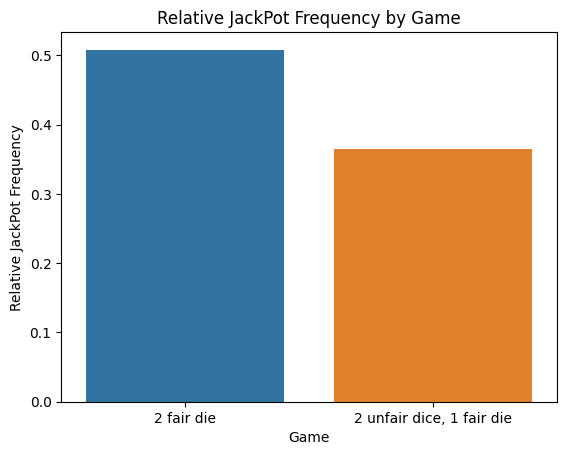

In [13]:
#Scenario 1
#6
data = [['2 fair die', freq_jackpot1], ['2 unfair dice, 1 fair die', freq_jackpot2]]
freqjackpotdf = pd.DataFrame(data,columns = ['game','jackpot frequency'])
sns.barplot(y='jackpot frequency',x='game',data=freqjackpotdf)
plt.xlabel("Game")
plt.ylabel("Relative JackPot Frequency")
plt.title("Relative JackPot Frequency by Game")

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [14]:
#Scenario 2
#1
faces = np.array([1,2,3,4,5,6])
mydie1 = Die(faces)
mydie2 = Die(faces)
mydie3 = Die(faces)
mydie1.dice

,weights
faces,
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


In [15]:
mydie2.dice

,weights
faces,
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


In [16]:
mydie3.dice

,weights
faces,
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [17]:
#Scenario 2 -- look at value chaning
#2
mydie1.change_weight(6,5)
mydie1.dice
#range(len(mydie1.dice))

,weights
faces,
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [18]:
#Scenario 2 -- look at
#3
mydie2.change_weight(1,5)
mydie2.dice

,weights
faces,
1,5.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [27]:
#Scenario 2
#4
game1 = Game([mydie3,mydie3,mydie3,mydie3,mydie3])
game1.play(10000)   
game1.result_df

,1,2,3,4,5
Roll Number,,,,,
1,3,4,4,2,6
2,1,4,6,2,6
3,6,1,3,5,3
4,5,3,5,5,2
5,4,3,5,3,6
...,...,...,...,...,...
9996,1,2,3,1,3
9997,3,3,3,4,1
9998,3,3,4,4,4


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [20]:
#Scenario 2
#5
game2 = Game([mydie1,mydie2,mydie3,mydie3,mydie3])
game2.play(10000) 
game2.result_df

,1,2,3,4,5
Roll Number,,,,,
1,6,6,1,3,6
2,6,1,6,2,4
3,6,1,5,4,2
4,6,1,3,4,5
5,4,1,1,5,2
...,...,...,...,...,...
9996,1,1,3,4,2
9997,6,1,2,4,2
9998,4,1,4,5,4


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

Text(0.5, 1.0, 'Relative JackPot Frequency by Game')

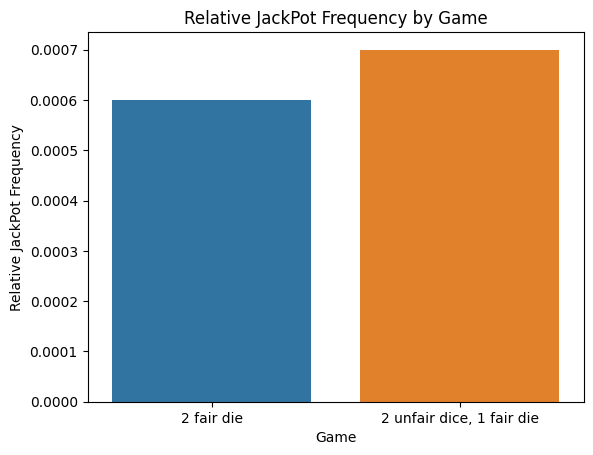

In [21]:
#Scenario 2
#6
anagame1 = Analyzer(game1)
jackpot1 = anagame1.jackpot()
anagame2 = Analyzer(game2)
jackpot2 = anagame2.jackpot()
freq_jackpot1 = jackpot1 / 10000
freq_jackpot2 = jackpot2 / 10000
data = [['2 fair die', freq_jackpot1], ['2 unfair dice, 1 fair die', freq_jackpot2]]
freqjackpotdf = pd.DataFrame(data,columns = ['game','jackpot frequency'])
sns.barplot(y='jackpot frequency',x='game',data=freqjackpotdf)
plt.xlabel("Game")
plt.ylabel("Relative JackPot Frequency")
plt.title("Relative JackPot Frequency by Game")

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [22]:
#Scenario 3
#1
letters = pd.read_csv('english_letters.txt',header = None, sep = " ")
letters.columns = ['Letter', 'Frequency']
letter_col = list(letters['Letter'])
faces = np.array(letter_col)
mydie1 = Die(faces)
for die in range(len(faces)):
    x = faces[die]
    y = letters['Frequency'][die]
    mydie1.change_weight(x,y)
mydie1.dice

,weights
faces,
E,529117365.0
T,390965105.0
A,374061888.0
O,326627740.0
I,320410057.0
N,313720540.0
S,294300210.0
R,277000841.0
H,216768975.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [23]:
#Scenario 3
#2
game1 = Game([mydie1,mydie1,mydie1,mydie1])
game1.play(1000)
game1.result_df

,1,2,3,4
Roll Number,,,,
1,R,I,O,I
2,U,L,I,C
3,Y,E,O,H
4,E,B,T,K
5,P,S,E,Z
...,...,...,...,...
996,A,H,J,E
997,E,O,O,R
998,Y,E,N,A


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [24]:
#Scenario 3
#3
words = pd.read_csv('scrabble_words.txt')
anagame1 = Analyzer(game1)
count = 0
results_df  = anagame1.permutation().reset_index()
cols = results_df.columns[:-1]
results_df['word'] = results_df[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)
results_df
for i in range(len(results_df['word'])):
    if results_df['word'][i] in words['AA'].values:
        count += 1
print(count)

52


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [25]:
#Scenario 3
#4
game2 = Game([mydie1,mydie1,mydie1,mydie1,mydie1])
game2.play(1000) 
words = pd.read_csv('scrabble_words.txt')
anagame2 = Analyzer(game2)
count = 0
results_df = anagame2.permutation().reset_index()
cols = results_df.columns[:-1]
results_df['word'] = results_df[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)
results_df
for i in range(len(results_df['word'])):
    if results_df['word'][i] in words['AA'].values:
        count += 1
print(count)

8


The game with four die produces more words than the game with five die.

# Submission

When finished completing the above tasks, save this file to your local repo (and within your project), and them push it to your GitHub repo.

Then convert this file to a PDF and submit it to GradeScope according to the assignment instructions in Canvas.